In [85]:
from sklearn import datasets
import numpy as np

iris_data = datasets.load_iris()
X = iris_data['data']
y = iris_data['target']

np.count_nonzero(y == 0), np.count_nonzero(y == 1), np.count_nonzero(y == 2)


(50, 50, 50)

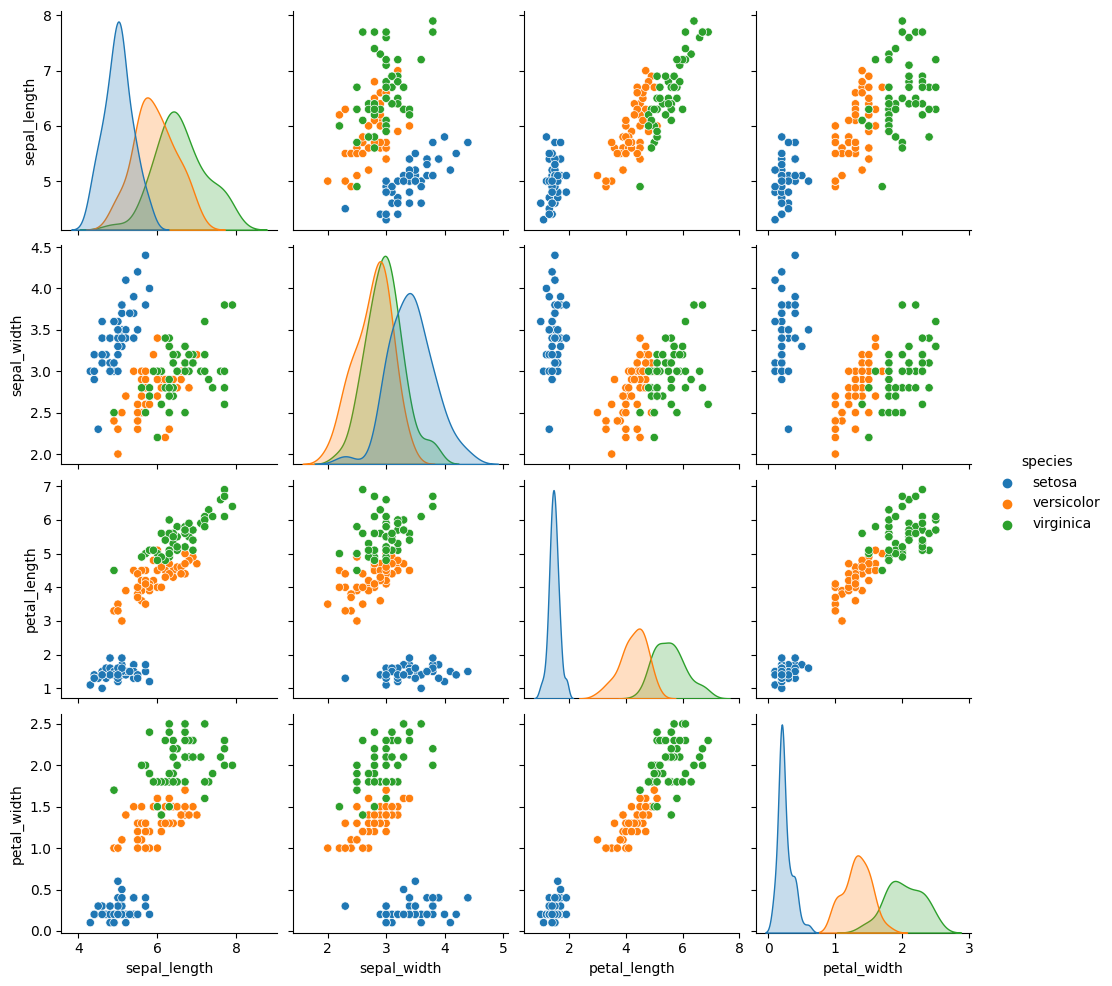

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Display pairplot
sns.pairplot(iris_df, hue="species", height=2.5)
plt.show()

In [87]:
import random
from numpy.typing import NDArray


def train_test_split(X: NDArray, y: NDArray, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    dataset = list(zip(X, y))
    random.shuffle(dataset)
    test_size_index = int(len(dataset) * test_size)
    X_test, y_test = zip(*dataset[:test_size_index])
    X_train, y_train = zip(*dataset[test_size_index:])
    
    return np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test)
    
    

In [102]:
from typing import Literal
import numpy as np


class Perception:
    def __init__(self, input_size: int, learning_rate: float=0.1):
        # xavier weight initialization 
        # self.weights = np.random.randn(input_size) / np.sqrt(input_size)
        self.weights = (np.random.randn(input_size) / np.sqrt(input_size)) * 0.1
        self.bias = np.zeros(1)
        self.learning_rate = learning_rate

    def step(self, x: any) -> Literal[0, 1]:
        return 1 if x > 0 else 0
    
    def backward(self, loss, inputs):
        self.weights += self.learning_rate * loss * inputs
        self.bias += self.learning_rate * loss
    
    def fit(self, X: NDArray, y: NDArray, epochs: int):
        for _ in range(epochs):
            for (inputs, target) in zip(X, y):
                prediction = self.step(np.dot(inputs, self.weights) + self.bias)
                loss = prediction - target
                self.backward(loss, inputs)
                    
    def predict(self, X: NDArray):
        return self.step(np.dot(X, self.weights) + self.bias)
        

In [103]:
import numpy as np

def transform_to_one_vs_all_labels(y: NDArray, target_class: int) -> NDArray:
    one_vs_all_labels = np.zeros_like(y)
    one_vs_all_labels[y == target_class] = 1
    return one_vs_all_labels

def fit_perception(X: NDArray, y: NDArray, epochs: int, learning_rate: float) -> Perception:
    perception = Perception(X.shape[1], learning_rate=learning_rate)
    perception.fit(X, y, epochs=epochs)
    return perception
    

In [104]:
classes = [0,1,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_targeted_dict = {
    target_class:
        [
            transform_to_one_vs_all_labels(y_train, target_class),
            transform_to_one_vs_all_labels(y_test, target_class)
        ]
        for target_class in classes
    }


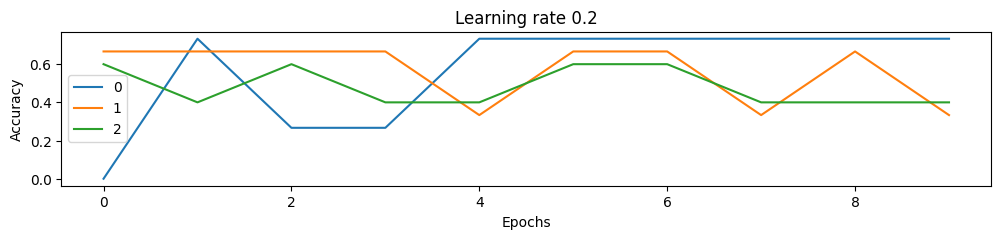

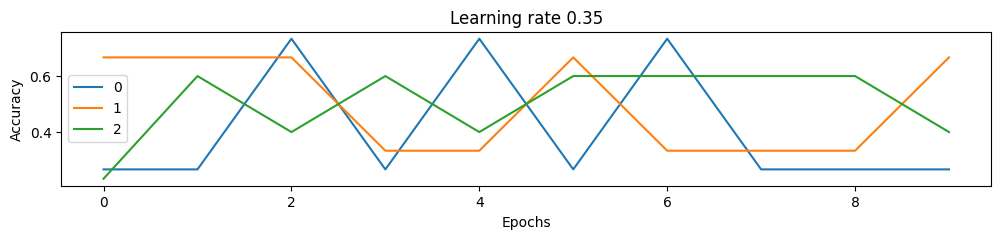

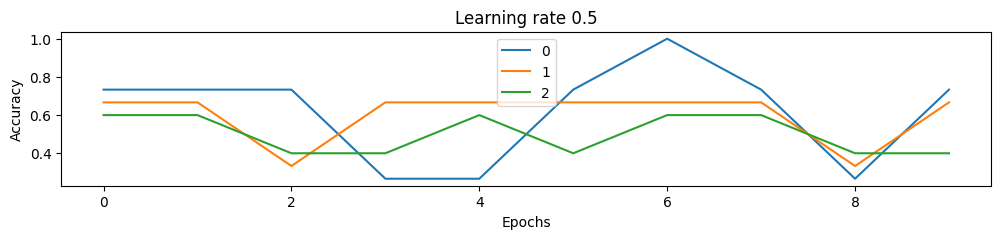

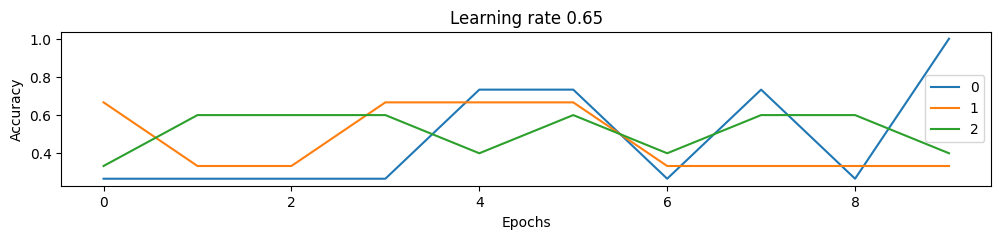

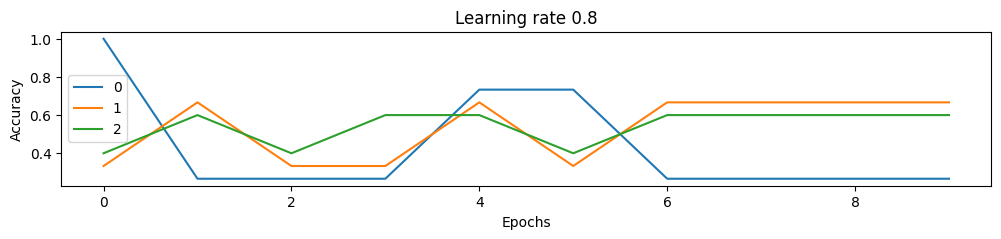

In [105]:
import matplotlib.pyplot as plt

def get_accuracy_maps(learning_rate: float) -> dict[int, dict[int, float]]:
   
    accuracy_maps = {}
    
    for epochs in range(0, 10, 1):
        accuracy_map = {key: 0 for key in classes}
        for target_class in classes:
            y_train_targeted, y_test_targeted = y_targeted_dict[target_class]
            perception = fit_perception(X_train, y_train_targeted, epochs, learning_rate)
            correct_guesses = 0
            total_targets = len(X_test)
            for (test_input, test_target) in zip(X_test, y_test_targeted):
                predicted = perception.predict(test_input)
                if (predicted == test_target):
                    correct_guesses+=1

            accuracy_map[target_class] = correct_guesses/total_targets
        accuracy_maps[epochs]=accuracy_map
        
    return accuracy_maps

def plot_accuracy(accuracy_dict: dict[int, dict[int, float]], learning_rate: float):
    epochs = list(accuracy_dict.keys())
    classes = list(accuracy_dict[epochs[0]].keys())
    
    
    plt.figure(figsize=(12, 2))

    for class_name in classes:
        accuracies = [accuracy_dict[epoch][class_name] for epoch in epochs]
        plt.plot(epochs, accuracies, label=class_name)

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Learning rate {learning_rate}')
    plt.legend()
    plt.show()

learning_rate = 0.2
while(learning_rate<0.9):
    plot_accuracy(get_accuracy_maps(learning_rate), learning_rate)
    learning_rate+=0.15

In [111]:
perception_0 = fit_perception(X_train, y_targeted_dict[0][0], epochs=5, learning_rate=0.2)
perception_1 = fit_perception(X_train, y_targeted_dict[1][0], epochs=5, learning_rate=0.2)
perception_2 = fit_perception(X_train, y_targeted_dict[2][0], epochs=5, learning_rate=0.2)

iris_perceptions = perception_0, perception_1, perception_2


In [112]:
perception_0.weights, perception_0.bias

(array([-210.40324619, -143.9922523 ,  -61.3479476 ,  -10.69450383]),
 array([-42.]))

In [113]:
def one_vs_all(p0: Perception, p1: Perception, p2: Perception, sample: NDArray) -> list[int]:
    is_0 = p0.predict(sample) == 1
    is_1 = p1.predict(sample) == 1
    is_2 = p2.predict(sample) == 1
    
    print(p0.predict(sample), p1.predict(sample), p2.predict(sample))
    
    if is_0:
        return 0
    
    if is_1:
        return 1
    
    if is_2:
        return 2
    

In [114]:
predicted_labels = []
correct_labels = []

for index in range(len(X_test)):
    sample, correct_label = X_test[index], y_test[index]
    prediction = one_vs_all(*iris_perceptions, sample)
    
    predicted_labels.append(prediction)   
    correct_labels.append(correct_label) 

0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0
0 1 0


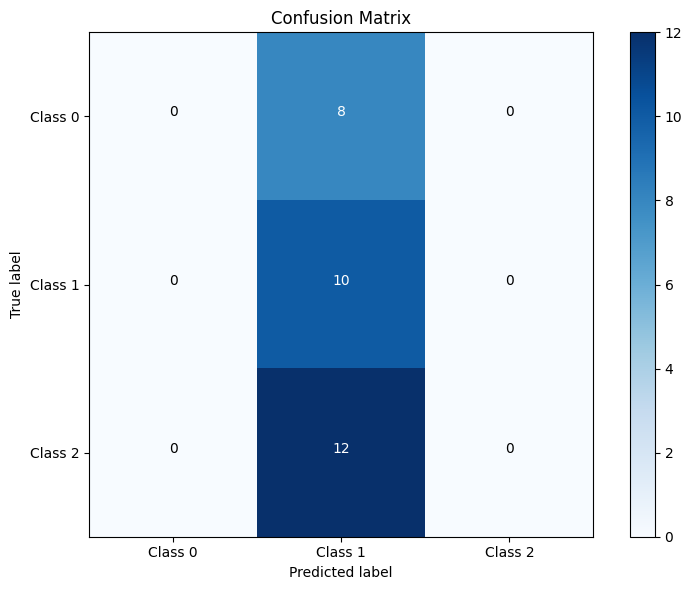

In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(correct_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])
plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])

# Add labels to each cell
for i in range(3):
    for j in range(3):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

